# Funds exploratory

We are going to perform an EDA on several mutual funds.

## Import libraries

In [3]:
library('reticulate')
source('../src/R/rfunds.R')

## Load data

In [4]:
reload <- TRUE
if (reload){
    pyfunds <- import_from_path('pyfunds', path = "../src/")
    dt <- import("datetime", convert = FALSE)
    funds<-read.table('fund_list.txt', na.strings="",stringsAsFactors=FALSE, skipNul = TRUE,header=FALSE)
    funds<-funds$V1
    m<-pyfunds$MorningStar(ISINs=funds, currency='EUR', start_date=dt$date(2009L, 1L, 1L))
    df_values<-m$df_values
    df_values$date<-as.POSIXct(rownames(df_values))
    saveRDS(df_values, file = "df_values.rds")
}else{
    df_values <- readRDS("df_values.rds")
}

All the funds start with an initial investment of 100:

In [4]:
head(df_values)

,IE0002639668,IE0007281425,IE0007292083,IE0007471695,IE0007472115,IE0007987690,IE0009591805,IE0031786142,IE0032620787,IE00B03HCZ61,⋯,IE00B5456744,IE00B04GQX83,IE0008248795,IE0031786696,LU1883867761,LU1861133657,LU0625742753,LU0625739619,LU0625739700,date
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
2009-01-01,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,⋯,NaN,100.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2009-01-01
2009-01-02,102.94,99.40,99.40,98.96,100.21,103.14,99.99,102.66,102.95,102.53,⋯,NaN,99.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2009-01-02
2009-01-03,102.94,99.40,99.40,98.96,100.21,103.14,99.99,102.66,102.95,102.53,⋯,NaN,99.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2009-01-03
2009-01-04,102.94,99.40,99.40,98.96,100.21,103.14,99.99,102.66,102.95,102.53,⋯,NaN,99.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2009-01-04
2009-01-05,104.72,101.47,101.48,100.81,100.06,105.26,100.12,108.50,104.73,104.68,⋯,NaN,101.31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2009-01-05
2009-01-06,107.51,102.01,102.02,102.62,99.29,107.38,99.78,112.41,107.52,107.12,⋯,NaN,103.69,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2009-01-06


## Data Analysis

First we calculate the ROI over a sliding window of one year for all the funds

In [5]:
df_roi<-calc_roi(df_values, num_days=365)

We can calculate a summary of the bonds:
* **mean:** Aritmetic mean of all the ROI values calculated over a sliding window
* **geom:** Geometric mean of all the ROI values calculated over a sliding window
* **var:** Variance of all the ROI values calculated over a sliding window
* **mindate:** Starting date of the fund history
* **days_losses:** Maximum number of consecutive losses the fund has experienced

In [6]:
df_summary<-calc_summary(df_values, num_days=365)
head(df_summary)

,mean,geom,var,mindate,days_losses
ES0110182039,1.0252015,1.0091451,0.0333569534,2009-01-01,408
ES0114105036,1.1845754,1.1781374,0.0155218222,2009-01-01,49
ES0148181003,1.0264804,1.0260561,0.0008520395,2019-04-05,27
ES0149051007,0.9806787,0.9699489,0.0214170464,2016-06-10,352
ES0158967036,1.0243760,1.0086710,0.0325565675,2009-01-01,408
IE0002639551,1.0842420,1.0765884,0.0166969865,2009-01-01,223


We can search for funds with high yield and low variance:

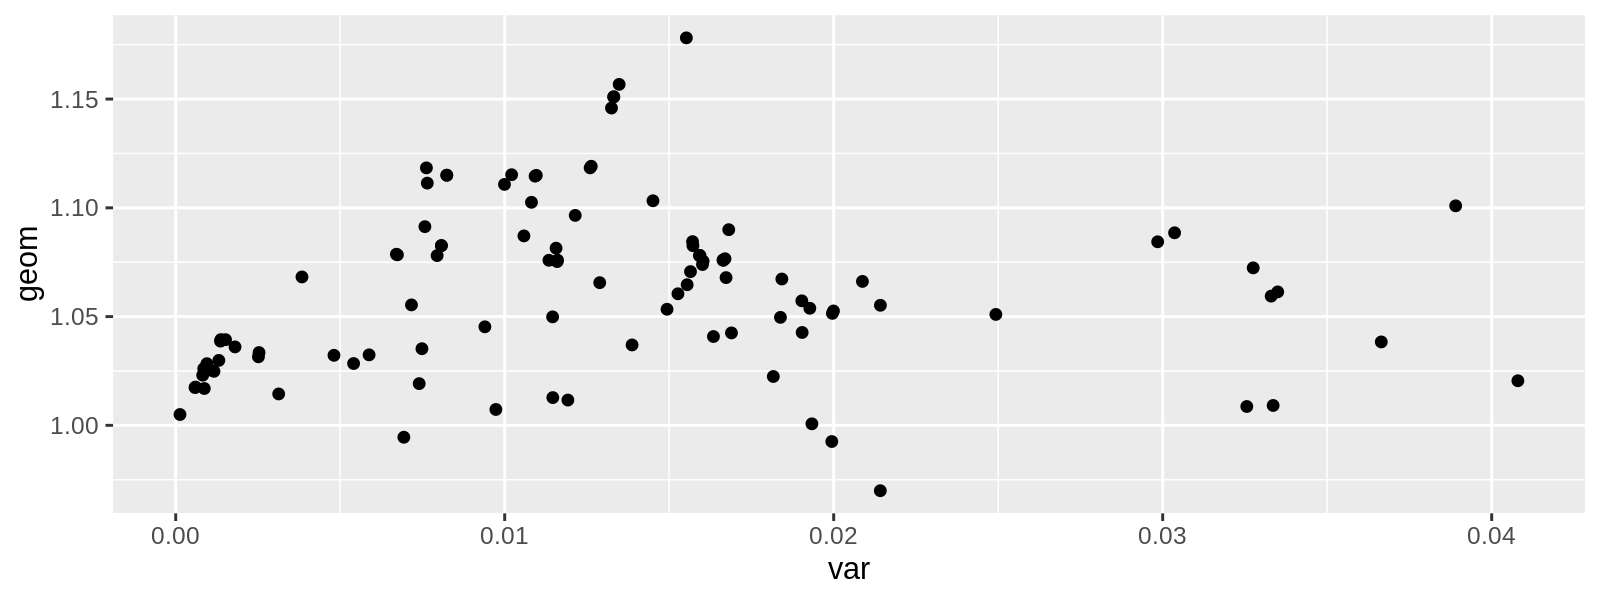

In [7]:
options(repr.plot.width=8,repr.plot.height=3,repr.plot.res = 200)

ggplot(df_summary,aes(x=var,y=geom))+geom_point()

Warning message:
“Removed 9977 row(s) containing missing values (geom_path).”

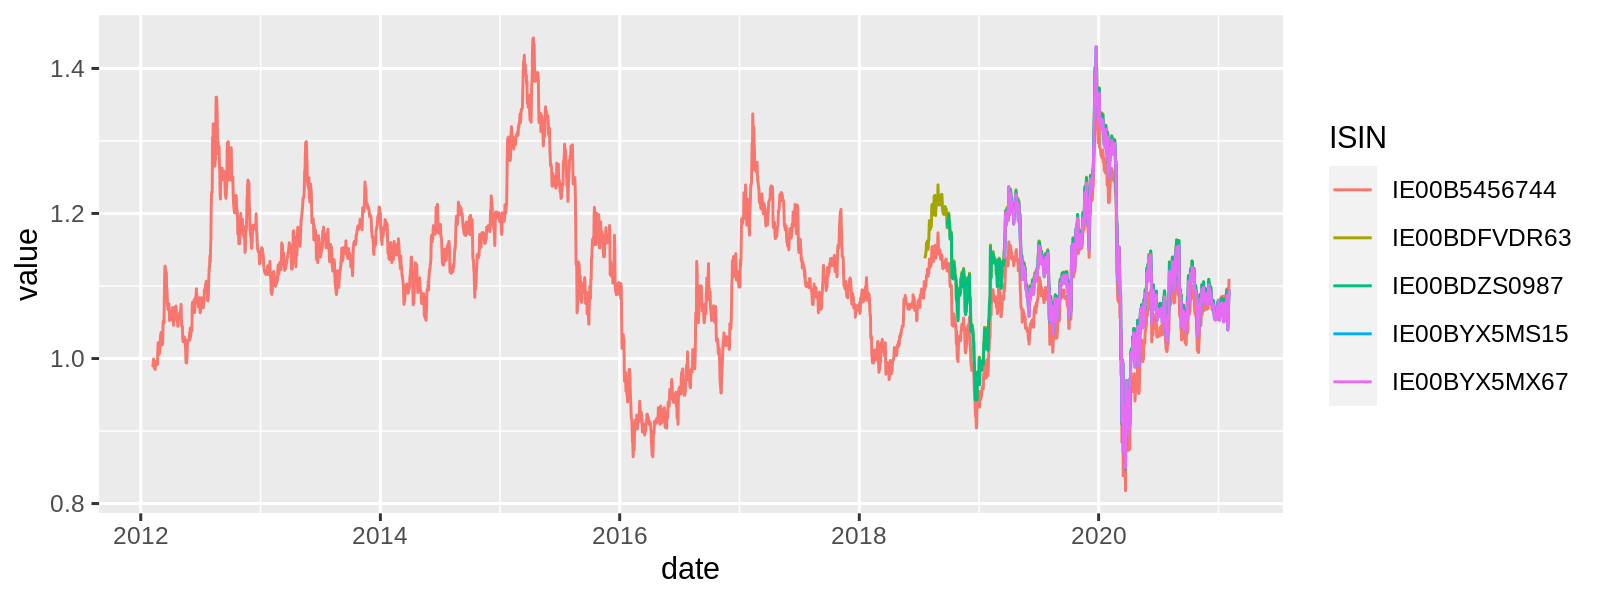

In [8]:
high_profit<-df_summary %>% filter(var<0.01) %>% filter(geom>1.1)
plot_funds(df_roi,funds=rownames(high_profit))

Warning message:
“Removed 5630 row(s) containing missing values (geom_path).”

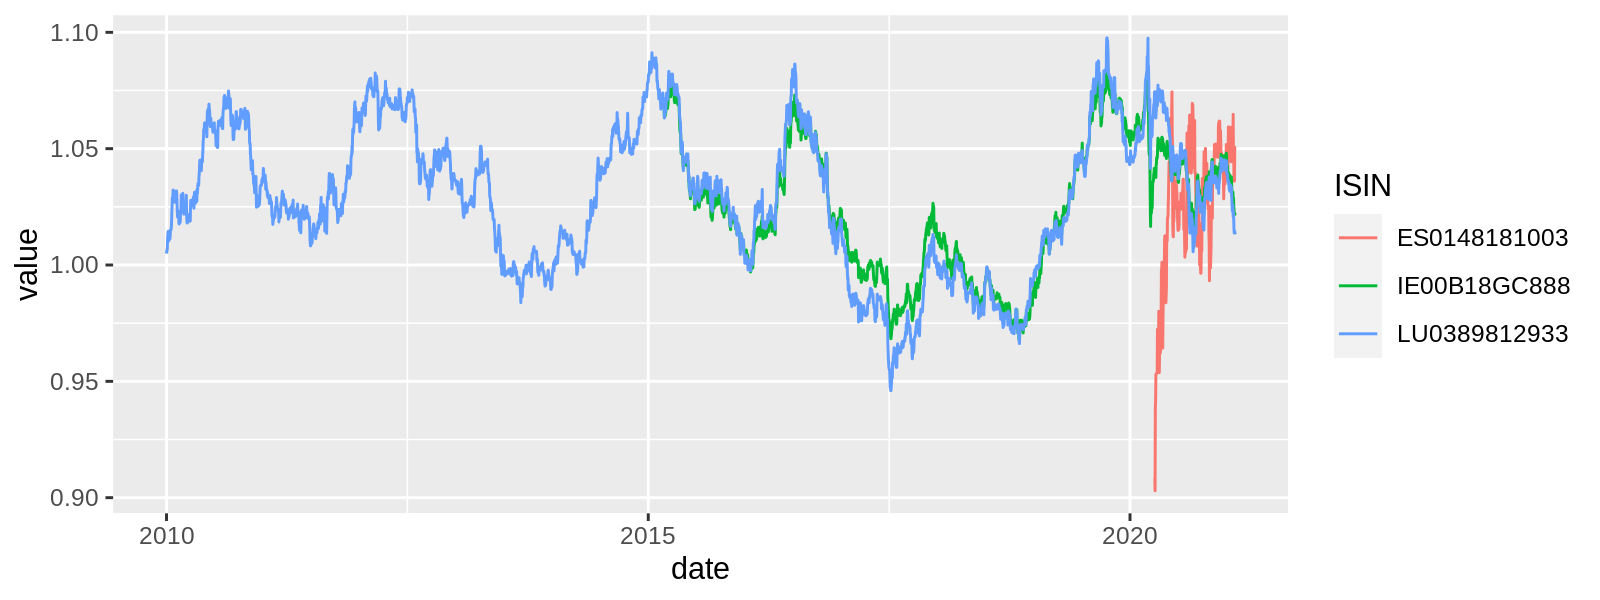

In [9]:
low_risk<-df_summary %>% filter(var<0.001) %>% filter(geom>1.02)
plot_funds(df_roi,funds=rownames(low_risk))

We can search for funds which have low perios ofs losses and high ROI:

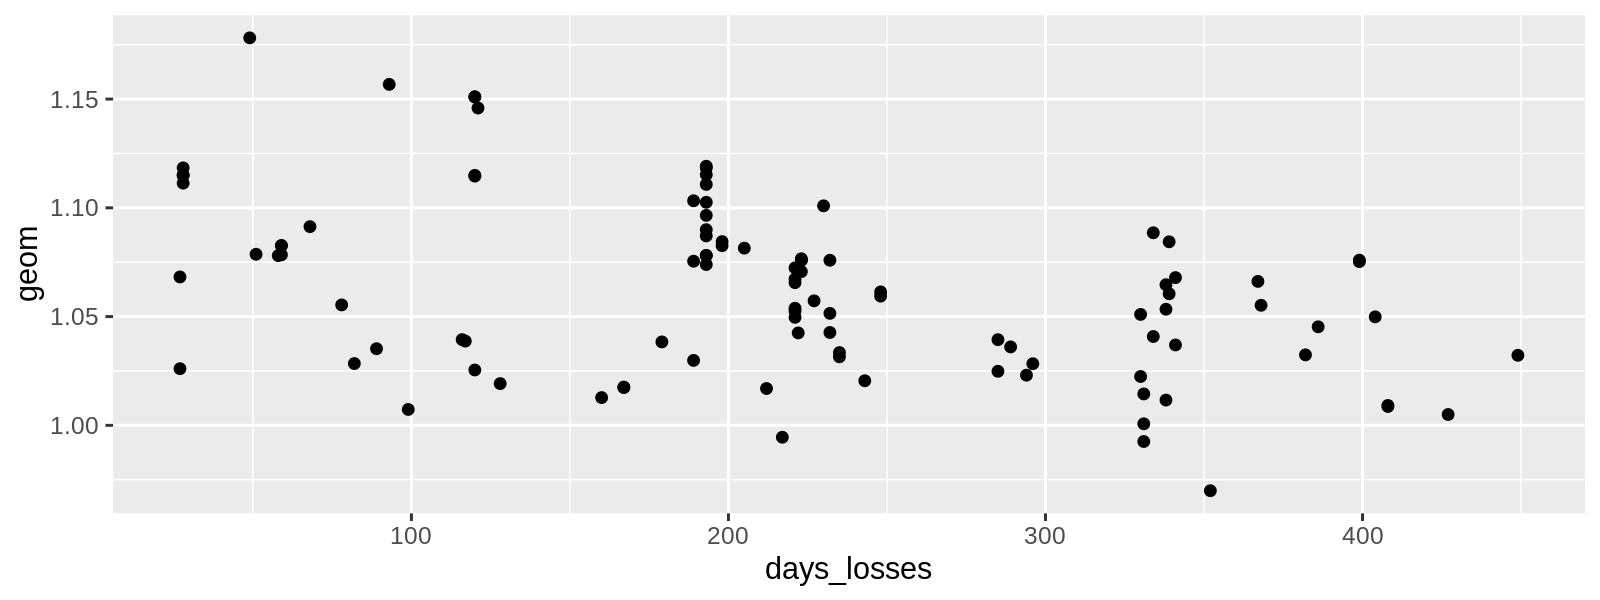

In [10]:
ggplot(df_summary,aes(x=days_losses,y=geom))+geom_point()

,mean,geom,var,mindate,days_losses
ES0114105036,1.184575,1.178137,0.015521822,2009-01-01,49
IE00B1W56J03,1.162413,1.156759,0.013478699,2009-01-01,93
IE00BD0NCM55,1.081713,1.078662,0.006707258,2017-05-11,51
IE00BD0NCN62,1.081477,1.078410,0.006738857,2017-05-11,59
IE00BDFVDR63,1.121711,1.118366,0.007620467,2017-07-20,28
IE00BDZS0987,1.114707,1.111358,0.007646916,2017-09-27,28
IE00BYX5MS15,1.118585,1.114994,0.008239993,2018-03-20,28
IE00BYX5MX67,1.118586,1.114995,0.008239595,2018-03-20,28
IE00BYX5N110,1.081781,1.078043,0.007945887,2018-03-20,58
IE00BYX5NK04,1.086278,1.082632,0.008076266,2018-03-20,59


Warning message:
“Removed 31907 row(s) containing missing values (geom_path).”

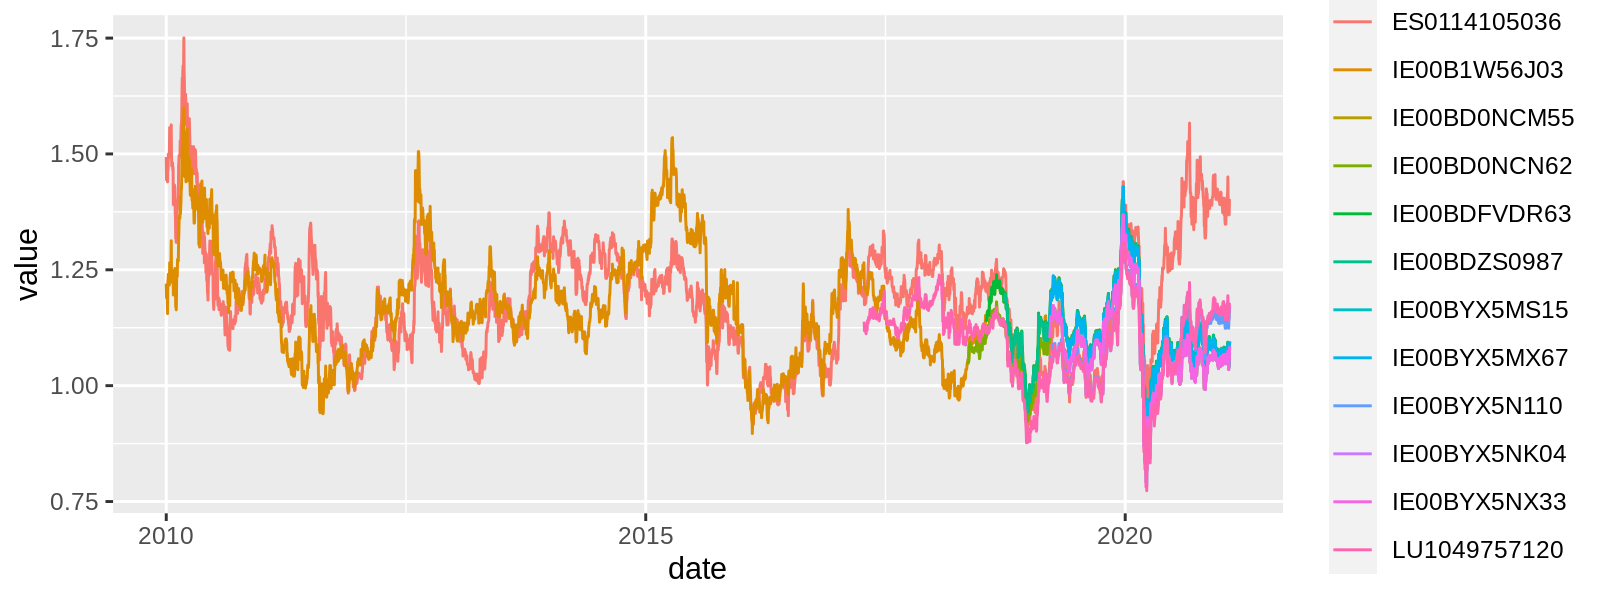

In [11]:
low_losses<-df_summary %>% filter(days_losses<100) %>% filter(geom>1.07)
low_losses
plot_funds(df_roi,funds=rownames(low_losses))

Warning message:
“Removed 7 row(s) containing missing values (geom_path).”

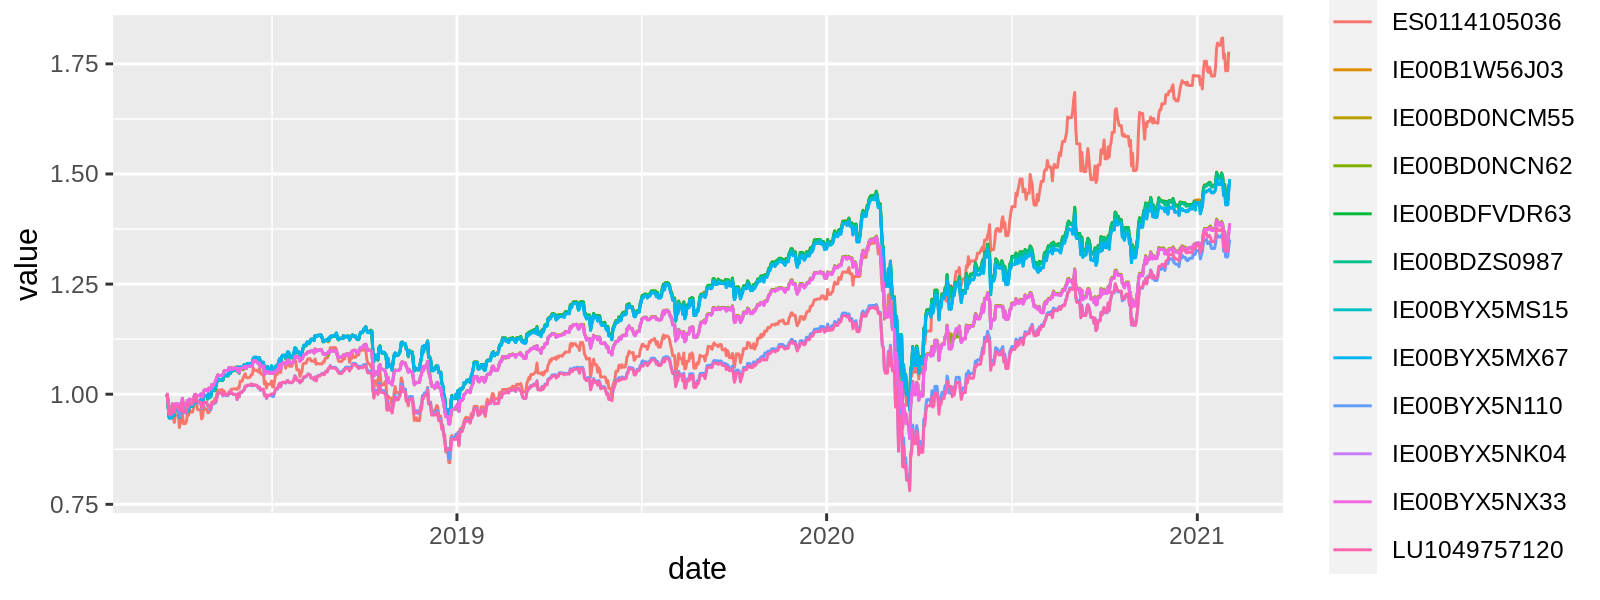

In [12]:
source('../src/R/rfunds.R')
plot_funds(df_values,funds=rownames(low_losses),start_date=max(low_losses$mindate))

We are going to look into the complete set of funds which have been working since 2016 and try to get the better combination of high ROI with low variance:

In [13]:
portfolio<- rownames(df_summary)[df_summary$mindate<'2016-01-01']
portfolio

[1] "ES0110182039" "ES0114105036" "ES0158967036" "IE0002639551" "IE0002639668"
 [6] "IE0007201266" "IE0007218849" "IE0007281425" "IE0007292083" "IE0007471695"
[11] "IE0007472115" "IE0007987690" "IE0008248795" "IE0009591805" "IE0031786142"
[16] "IE0031786696" "IE0032125126" "IE0032620787" "IE00B03HCZ61" "IE00B03HD191"
[21] "IE00B04FFJ44" "IE00B04GQQ17" "IE00B04GQR24" "IE00B04GQT48" "IE00B04GQX83"
[26] "IE00B18GC888" "IE00B1W56J03" "IE00B1W56M32" "IE00B1W56S93" "IE00B246KL88"
[31] "IE00B3B2KS38" "IE00B3D07F16" "IE00B3D07G23" "IE00B42LF923" "IE00B42W3S00"
[36] "IE00B4K9F548" "IE00B4XCK338" "IE00B5456744" "IE00B56H2V49" "IE00B62C5H76"
[41] "IE00B6RVWW34" "IE00B83YJG36" "IE00B89M2V73" "IE00BGCZ0826" "IE00BH65QK91"
[46] "IE00BH65QN23" "LU0148539108" "LU0261952682" "LU0389811372" "LU0389811885"
[51] "LU0389812347" "LU0389812933" "LU0390717543" "LU0474966750" "LU0474966834"
[56] "LU0474967055" "LU0474968020" "LU0625737910" "LU0625739619" "LU0625739700"
[61] "LU0625742753" "LU0836512615" "LU0836513266" "LU0836513423" "LU0836513696"
[66] "LU0836513852" "LU0996176912" "LU0996177134" "LU0996178884" "LU0996179007"
[71] "LU0996180864" "LU0996182308" "LU0996182563" "LU1050469367" "LU1050469441"
[76] "LU1050470373" "LU1328852659" "LU1883311653" "LU1883867761"

In [14]:
coefs <- calc_optim(na.omit(df_roi[,portfolio]), variance_importance=100)


Iter: 1 fn: -0.3675	 Pars:  8.162e-04 9.312e-02 3.159e-02 2.113e-08 1.081e-06 4.207e-08 4.209e-08 1.308e-07 1.307e-07 7.826e-09 4.049e-08 2.052e-08 3.190e-08 1.895e-07 2.620e-08 2.844e-08 4.201e-08 1.077e-06 4.644e-08 4.834e-08 2.136e-07 5.567e-08 5.809e-08 1.985e-09 2.117e-09 2.644e-08 1.552e-06 1.125e-07 4.493e-08 8.633e-13 5.483e-08 3.374e-08 3.416e-08 1.575e-07 1.518e-07 2.597e-08 4.777e-01 2.608e-08 4.406e-08 5.868e-08 1.101e-07 8.744e-09 8.921e-09 1.999e-08 3.717e-01 2.045e-07 3.791e-08 8.055e-09 3.216e-08 1.913e-08 8.836e-08 2.408e-08 5.166e-08 1.232e-07 1.099e-07 3.846e-08 2.299e-08 1.505e-02 2.399e-08 2.100e-08 6.241e-08 5.584e-08 2.797e-08 4.458e-08 3.193e-10 1.066e-08 2.687e-08 2.628e-08 1.006e-02 4.484e-06 1.109e-07 4.663e-08 4.461e-08 9.028e-08 9.009e-08 5.053e-08 6.980e-09 3.582e-09 1.387e-08
Iter: 2 fn: -0.3675	 Pars:  8.134e-04 9.312e-02 3.159e-02 2.113e-08 1.081e-06 4.207e-08 4.209e-08 1.308e-07 1.307e-07 7.826e-09 4.048e-08 2.052e-08 3.190e-08 1.895e-07 2.620e-08 2.8

This is the optimul ratio of coefficients for each fund:

In [15]:
coefs

ES0114105036 ES0158967036 IE00B4XCK338 IE00BH65QK91 LU0625737910 LU0996178884 
  0.09317454   0.03162530   0.47808247   0.37199760   0.01501201   0.01010809

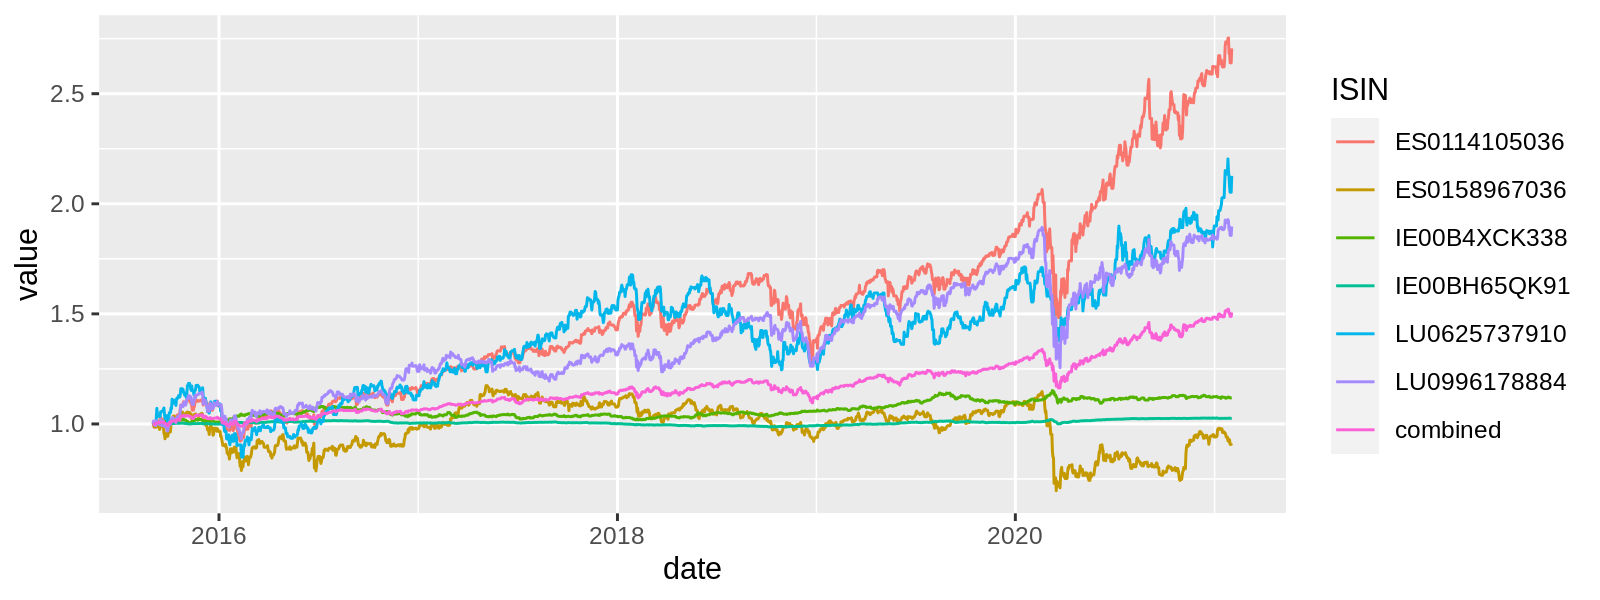

In [16]:
df_sim<-simulate_investment(df_values[,c("date",portfolio)],coefs)
plot_funds(df_sim,start_date = min(df_sim$date))

As show bellow our combined fund would have a APR of 7%. 
And would have been under 47 days of consecutive losses over a year.

In [17]:
calc_summary(df_sim,num_days = 365)

,mean,geom,var,mindate,days_losses
combined,1.0679077,1.0670228,0.0019148778,2015-09-02,48
ES0114105036,1.1889602,1.1819633,0.0165713793,2015-09-02,49
ES0158967036,0.9947649,0.9834594,0.0228674380,2015-09-02,352
IE00B4XCK338,1.0173624,1.0169363,0.0008687848,2015-09-02,212
IE00BH65QK91,1.0030408,1.0029659,0.0001502783,2015-09-02,427
LU0625737910,1.1372621,1.1261786,0.0241327517,2015-09-02,181
LU0996178884,1.1163168,1.1132317,0.0069831452,2015-09-02,29


We could remove the fund ES0158967036 which performed quite pooly but in doing so we will slighly increase or variance:

In [18]:
coefs<-coefs[c("ES0114105036","IE00B4XCK338","IE00BH65QK91")]
coefs<-coefs/sum(coefs)

,mean,geom,var,mindate,days_losses
combined,1.068835,1.067914,0.0020125736,2015-09-02,34
ES0114105036,1.188960,1.181963,0.0165713793,2015-09-02,49
IE00B4XCK338,1.017362,1.016936,0.0008687848,2015-09-02,212
IE00BH65QK91,1.003041,1.002966,0.0001502783,2015-09-02,427


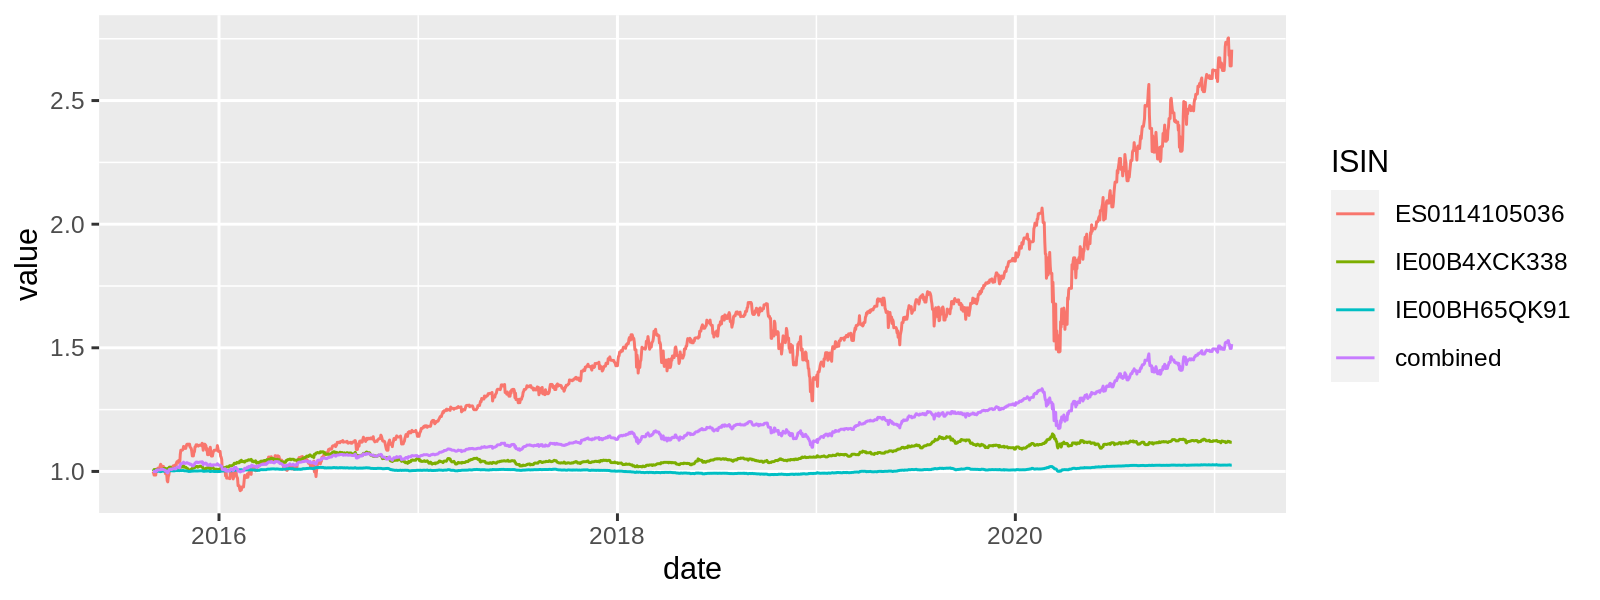

In [19]:
df_sim<-simulate_investment(df_values[,c("date",portfolio)],coefs)
plot_funds(df_sim,start_date = min(df_sim$date))
calc_summary(df_sim,num_days = 365)